## Database Connectivity

In [ ]:
import mysql.connector

In [ ]:
# Write a Python program to print the names of the players and the team of each player of all those players whose jersey 
# number is a prime number. 
# 1. The list should be ordered in reverse alphabetical order of player names. If two or more players have the same name, 
# then further sorting should be done on the team name, again in reverse alphabetical order.
# 2. The format of output is as given below:
# Name of the player, followed by a comma (,), then a space and then the team name.
# For example, if Arjun has jersey number 5 and is playing for All Stars and Pranav, with jersey number 7, is playing for 
# team Amigos, then the output will be:
# Pranav, Amigos
# Arjun, All Stars

def isPrime(num):
    if(num==1):
        return False
    elif(num==2 or num==3):
        return True
        
    for i in range(2,num // 2 + 1):
        if(num % i == 0):
            return False
    return True
try:
    conn = None
    conn = mysql.connector.connect(database = "football",user = "root",password = "India@122",host = "127.0.0.1",auth_plugin='mysql_native_password')
    cur = conn.cursor()
    cur.execute('''select  players.name,teams.name,players.jersey_no from players inner join teams on players.team_id = \
    teams.team_id order by players.name desc,teams.name desc''')
    rows = cur.fetchall()
    for row in rows:
        pname = row[0]
        tname = row[1]
        jno = row[2]
        if isPrime(jno):
            print(pname+", "+tname)
    conn.commit()
    cur.close()
    
except mysql.connector.Error as err:
    print(err)
    print("Error Code:", err.errno)
    print("SQLSTATE", err.sqlstate)
    print("Message", err.msg)
    
finally:
    if conn is not None:
        conn.close()

In [ ]:
# Write a Python program to print an encoding of the ids of the teams whose jersey colour at home is different from the 
# jersey colour when they play away from home.
# 1. The encoding must be using a shift cipher, which is detailed below.
#      An alphabet is mapped to another alphabet as follows. For a given alphabet α, let pos be the position at which α 
#      occurs in the alphabet listing (A at 1, B at 2, …. Z at 26). Then the encoding of α is the alphabet at the position (pos 
#      + 7) mod 26.
#      For example, if M is the alphabet, then the position at which M occurs in the alphabet listing is 13. Then, the 
#      encoding of M is the alphabet at the position (13 + 7) mod 26 = 20, which is T. 
#      For each digit β, the encoding of β is (β+7) mod 10.
#      For example, if 3 is the digit, then the encoding of 3 is the number (3 + 7) mod 10 = 0.
# The ids should be listed in the ascending order before performing the encoding.
# Each line in the output of the program must correspond to one row retrieved from the table.

try:
    conn = None
    conn = mysql.connector.connect(database = "football",user = "root",password = "Aayushi@123",host = "localhost",auth_plugin='mysql_native_password')
    cur = conn.cursor()
    cur.execute('''select team_id from teams where jersey_home_color <> jersey_away_color''')
    rows = cur.fetchall()
    letter = "ABCDEFGHIJKLMNOPQRSTUUVWXYZ"
    for row in rows:
        s = ""
        for j in row[0]:
            if(j.isalpha()):
                s = s + letter[(letter.index(j)+7)%26]
            else:
                s = s + str((int(j) + 7) % 10)
        print(s)
    conn.commit()
    cur.close()
    
except mysql.connector.Error as err:
    print(err)
    print("Error Code:", err.errno)
    print("SQLSTATE", err.sqlstate)
    print("Message", err.msg)
    
finally:
    if conn is not None:
        conn.close()

In [ ]:
# Write a Python program to output the jersey number of the player. Player's name is given in a file named 'player.txt' 
# resides in the same folder as python program file. 
# The output of the python program is only jersey number.  
# For example, if the jersey number of the player is 99. Then output must be 99 only. Note: No spaces.

f = open('player.txt','r')
name = f.read()

try:
    conn = None
    conn = mysql.connector.connect(database = "football",user = "root",password = "Aayushi@123",host = "localhost",auth_plugin='mysql_native_password')
    cur = conn.cursor()
    cur.execute("select jersey_no from players where name = %s",(name,))
    result = cur.fetchall()
    for i in result:
        print(i[0])
    cur.close()
    
except mysql.connector.Error as err:
    print(err)
    print("Error Code:", err.errno)
    print("SQLSTATE", err.sqlstate)
    print("Message", err.msg)
    
finally:
    if conn is not None:
        conn.close()

In [ ]:
# Write a Python program to print the roll number of the student. Student's first name is given in a file named 'name.txt' 
# resides in the same folder as python program file.
# The output of the python program is only roll number.  
# For example, if the first name of the student is 'Vikas'. Then output must be CS01 only. Note: No spaces.

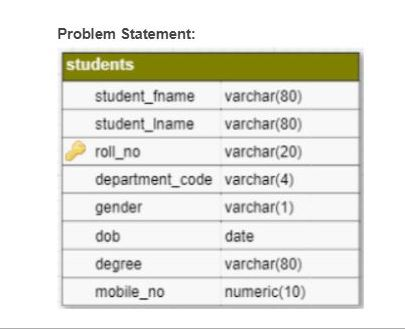

In [ ]:
f = open('name.txt','r')
name = f.read()

try:
    conn = None
    conn = mysql.connector.connect(database = "student",user = "root",password = "India@122",host = '127.0.0.1',auth_plugin='mysql_native_password')
    cur = conn.cursor()
    cur.execute("select roll_no from students where student_fname = %s",(name,))
    result = cur.fetchall()
    for i in result:
        print(i[0])
    cur.close()
    conn.commit()
    
except mysql.connector.Error as err:
    print(err)
    print("Error Code:", err.errno)
    print("SQLSTATE", err.sqlstate)
    print("Message", err.msg)
    
finally:
    if conn is not None:
        conn.close()

In [ ]:
# write a Python program to print the playground of the given team id. team_id is given in a file named 'team.txt' resides 
# in the same folder as python program file.
# 1. The output of the python program is only playground name.
# 2. For example, if the team_id is 'T0002' . Then output must be Villa Park only

f = open('team.txt','r')
team = f.read()

try:
    conn = None
    conn = mysql.connector.connect(database = 'football',user = 'root',password = 'India@122',host = "127.0.0.1",auth_plugin='mysql_native_password')
    cur = conn.cursor()
    cur.execute("select playground from teams where team_id = %s",(team,))
    result = cur.fetchall()
    for i in result:
        print(i[0])
    conn.commit()
    cur.close()
    
except mysql.connector.Error as err:
    print(err)
    print("Error Code:", err.errno)
    print("SQLSTATE", err.sqlstate)
    print("Message", err.msg)
    
finally:
    if conn is not None:
        conn.close()

In [ ]:
# Write a Python program to print the student's first name, the corresponding department name and the respective year of
# date of birth, if the year is even then print "Even" or else "Odd".
# Student's first name is given in a file named 'name.txt' resides in the same folder as python program file.
# The output of the python program is only student's first name, the corresponding department name and year of date of 
# birth,if the year is even then "Even" or else "Odd".
# For example, 'Suman' and 'Computer Science' is the name and department name of the student. '2002' is the year he was 
# born in. '2002' is even. Then, the final output will be Suman,Computer Science,Even only. Note: No spaces.
# For example, 'Vinod' and 'Electrical Engineering' is the name and department name of the student. '2003' is the year he 
# was born in. '2003' is not even. Then, the final output will be Vinod,Electrical Engineering,Odd only. Note: No spaces.

f = open('name1.txt','r')
name = f.read()

try:
    conn = None
    conn = mysql.connector.connect(database = 'library',user = 'root',password = 'India@122',host = "127.0.0.1",auth_plugin='mysql_native_password')
    cur = conn.cursor()
    cur.execute("select s.student_fname,d.department_name,s.dob from students s inner join departments d on \
                s.department_code = d.department_code where s.student_fname=%s",(name,))
    rows = cur.fetchall()
    for row in rows:
        date = int(str(row[2]).split("-")[0])
        if(date%2==0):
            print(row[0],row[1],"Even")
        else:
            print(row[0],row[1],"Odd")
    conn.commit()
    cur.close()
    
except mysql.connector.Error as err:
    print(err)
    print("Error Code:", err.errno)
    print("SQLSTATE", err.sqlstate)
    print("Message", err.msg)
    
finally:
    if conn is not None:
        conn.close()

In [ ]:
# In this question, you must write a Python program to output the name of the main referee for a given match date 
# (in yyyy-mm-dd format). The input to your program is a file named “date.txt” that has the match date as the first word 
# of the file. Your program must assume that date.txt resides in the same folder as your Python program. 
# The output name has to be formatted as follows. The last name is displayed followed by the initials of the first name, 
# then a full stop, a space and then the initials of the middle name (if the middle name exists), followed by a full stop.
# 1. For example, if the name of the main referee is "Kennedy Sapam", the output must be "Sapam K.” .
# 2. If the name of the main referee is “Asit Kumar Sarkar”, the output must be ”Sarkar A. K.”

f = open('date.txt','r')
    date = f.read()
    date = date.split("-")
    
try:
    conn = None
    conn = mysql.connector.connect(database = "football",user = "root",password = "India@122",host = "127.0.0.1",auth_plugin='mysql_native_password')
    cur = conn.cursor()
    cur.execute("select r.name,matches.match_date from referees r inner join match_referees m on r.referee_id = m.referee inner join matches on m.match_num = matches.match_num")
    rows = cur.fetchall()
    for row in rows:
        name = row[0].split(" ")
        match_date = str(row[1]).split("-")
        if(match_date==date):
            if(len(name)==3):
                first_name = name[0]
                middle_name = name[1]
                last_name = name[2]
                print(last_name+" "+first_name[0]+". "+middle_name[0]+".")
            else:
                first_name = name[0]
                last_name = name[1]
                print(last_name+" "+first_name[0]+".")
    conn.commit()
    cur.close()
except mysql.connector.Error as err:
    print(err)
    print("Error Code:", err.errno)
    print("SQLSTATE", err.sqlstate)
    print("Message", err.msg)
finally:
    if conn is not None:
        conn.close()

In [ ]:
# Write a Python program to find the cosine of a number obtained from performing a computation on a value retrieved from the 
# database. 
# 1. Find the sum of scores of all host teams satisfying the following conditions.
# a. host_team_score > guest_team_score
# b. name of the host team starts with the character given in the input file ‘parameter.txt’. You have to read the character 
# from the file and use it in your query to retrieve the expected sum. Your program must assume that parameter.txt resides 
# in the same folder as your Python program. 
# 2. Let this sum be denoted by ‘S’. Compute X = S * 10. 
# 3. Assuming that X is a value in radians, convert it into degrees. That is, let X_deg = X * (pi/180).
# 4. Then, using the math library in Python, find cos(X_deg) correct up to two decimal places, where cos denotes the 
# mathematical trigonometric function cosine.
# 5. For example, if the sum of scores of all host teams satisfying the given conditions is 5, then the output is 
# round(cos(5*10*(pi/180)),2).

f = open('parameter.txt','r')
team = f.read()
try:
    conn = None
    conn = mysql.connector.connect(database = "football",user = "root",password = "India@122",host = "127.0.0.1",auth_plugin='mysql_native_password')
    cur = conn.cursor()
    cur.execute("select matches.host_team_score,matches.guest_team_score,teams.name from matches inner join teams on \
    matches.host_team_id=teams.team_id")
    rows = cur.fetchall()
    s = 0
    for row in rows:
        if(team == row[2][0]):
            if(row[0]>row[1]):
                s = s + row[0]
    print(round(cos(s*10*(pi/180)),2))
    conn.commit()
    cur.close()

except mysql.connector.Error as err:
    print(err)
    print("Error Code:", err.errno)
    print("SQLSTATE", err.sqlstate)
    print("Message", err.msg)
    
finally:
    if conn is not None:
        conn.close()

In [ ]:
# Write a Python program to print the ISBN numbers of books which are published in a given year. Here, the year is 
# obtained as the value of function L(x) (given after the sample output) at x. You have to read the value of x from the 
# input file "number.txt", and use it to find the value of L(x). Your program must assume that the file number.txt resides 
# in the same folder as your Python program.
# You have to iterate through the list and print each value separately as shown in the output below: 
# 9789352921171
# 9789351343202
# 9789353333380
# The line function is given below:
# L3(x) = 2000 + 5*x + 3

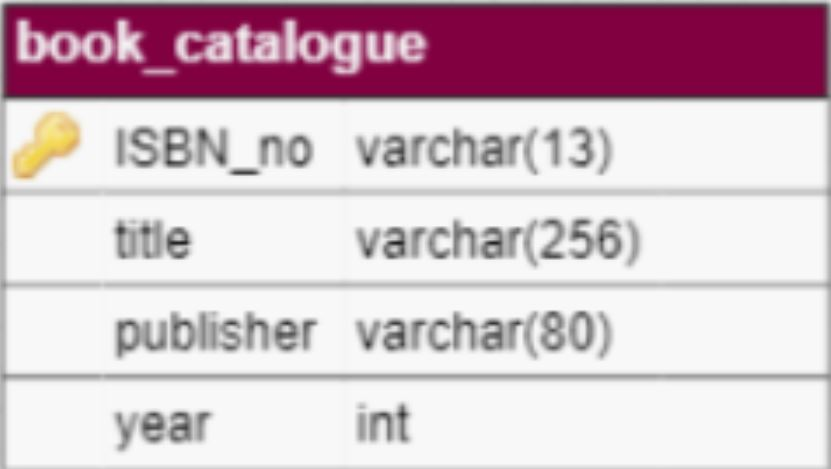

In [ ]:
f = open("number.txt","r")
x = f.read()
try:
    l = 2000 + 5 * int(x) + 3
    conn = None
    conn = mysql.connector.connect(database="Library",user="root",password="India@122",host="127.0.0.1",auth_plugin='mysql_native_password')
    cur = conn.cursor()
    cur.execute("select ISBN_no from book_catalogue where year = %s",(l,))
    rows = cur.fetchall()
    for i in rows:
        print(i[0])
    conn.commit()
    cur.close()
    
    
except mysql.connector.Error as err:
    print(err)
    print("Error Code:", err.errno)
    print("SQLSTATE", err.sqlstate)
    print("Message", err.msg)
    
finally:
    if conn is not None:
        conn.close()